In [1]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# Windows 한글 폰트 설정 (예: 맑은 고딕)
plt.rcParams['font.family'] = 'Malgun Gothic'

# 마이너스 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("crime.csv", encoding='utf-8', low_memory=False)

In [4]:
import pandas as pd
from scipy.stats import chi2_contingency

# Arrest가 True/False로 되어 있으므로 1/0으로 변환
df['Arrest_numeric'] = df['Arrest'].astype(int)

# 교차표 만들기: Community Area vs Arrest 여부
contingency_table = pd.crosstab(df['Community Area'], df['Arrest_numeric'])

# 카이제곱 독립성 검정
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# 결과 출력
print("Chi-squared 통계량:", round(chi2_stat, 4))
print("p-value:", p_value)
print("자유도:", dof)


Chi-squared 통계량: 199879.9195
p-value: 0.0
자유도: 76


In [5]:
import numpy as np
from scipy.stats import chi2_contingency

# 교차표는 이미 만들어져 있다고 가정
contingency_table = pd.crosstab(df['Community Area'], df['Arrest_numeric'])

# 카이제곱 통계량, 총합, 행/열 개수로 Cramér's V 계산
chi2_stat, _, _, _ = chi2_contingency(contingency_table)

n = contingency_table.sum().sum()  # 전체 관측치 수
min_dim = min(contingency_table.shape) - 1  # 자유도 기준

cramers_v = np.sqrt(chi2_stat / (n * min_dim))
print("Cramér's V:", round(cramers_v, 4))


Cramér's V: 0.1554


C:\Users\qhwhr\AppData\Local\Temp\ipykernel_30132\4005951471.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Standardized Residual', y='Label', data=top_residuals, palette='Blues_d')


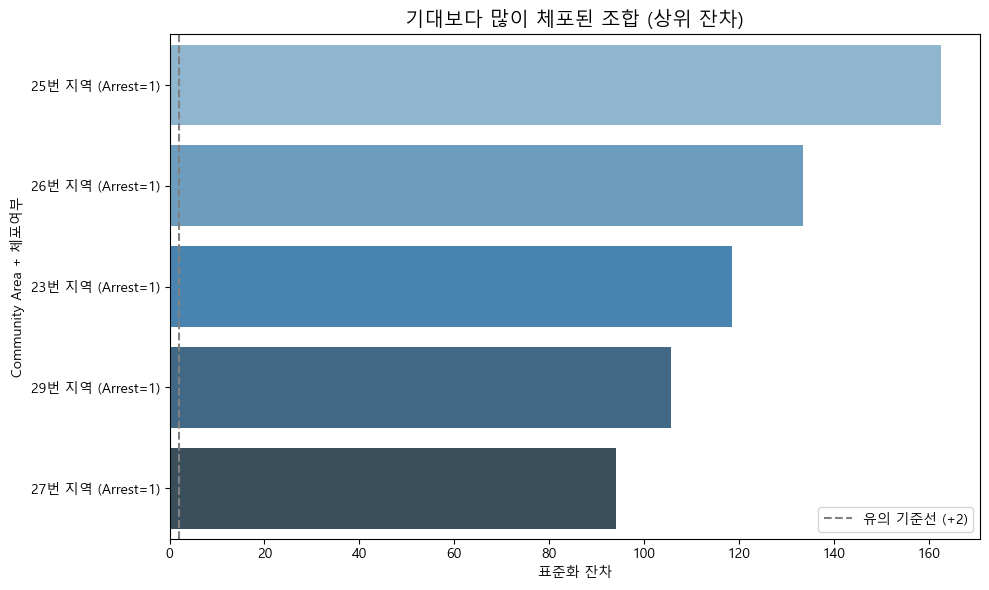

C:\Users\qhwhr\AppData\Local\Temp\ipykernel_30132\4005951471.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Standardized Residual', y='Label', data=bottom_residuals, palette='Reds_d')


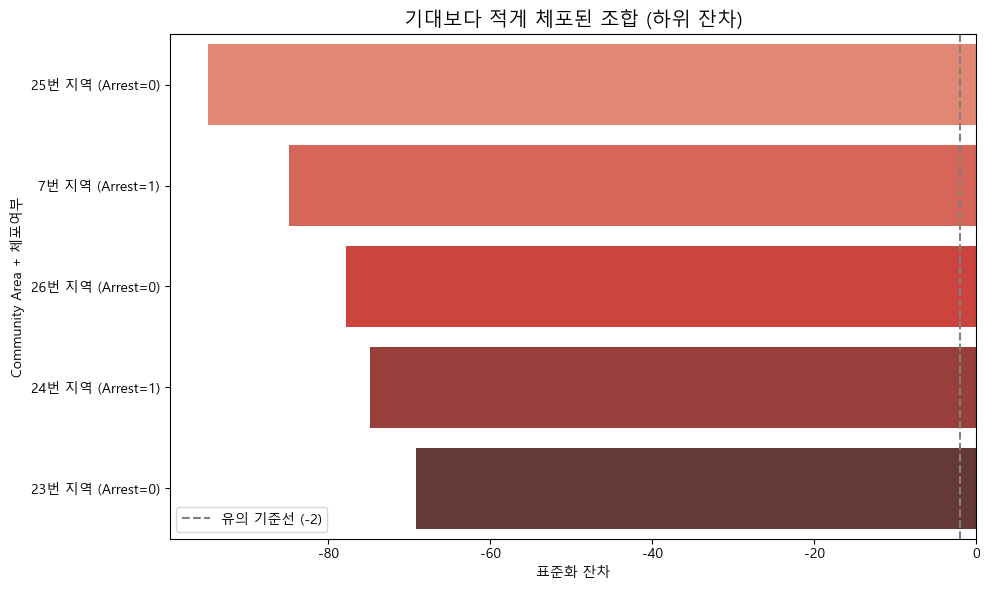

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# 표준화 잔차 계산
standardized_residuals = (contingency_table - expected) / np.sqrt(expected)

# DataFrame 형태로 변환
residuals_df = standardized_residuals.stack().reset_index()
residuals_df.columns = ['Community Area', 'Arrest (0=No,1=Yes)', 'Standardized Residual']
residuals_df['Abs Residual'] = residuals_df['Standardized Residual'].abs()

# 상위 5개 (기대보다 많이 체포된 조합)
top_residuals = residuals_df.sort_values(by='Standardized Residual', ascending=False).head(5)
top_residuals['Label'] = top_residuals['Community Area'].astype(int).astype(str) + '번 지역 (Arrest=' + top_residuals['Arrest (0=No,1=Yes)'].astype(str) + ')'

# 하위 5개 (기대보다 적게 체포된 조합)
bottom_residuals = residuals_df.sort_values(by='Standardized Residual', ascending=True).head(5)
bottom_residuals['Label'] = bottom_residuals['Community Area'].astype(int).astype(str) + '번 지역 (Arrest=' + bottom_residuals['Arrest (0=No,1=Yes)'].astype(str) + ')'

# 시각화: 상위 잔차
plt.figure(figsize=(10, 6))
sns.barplot(x='Standardized Residual', y='Label', data=top_residuals, palette='Blues_d')
plt.title('기대보다 많이 체포된 조합 (상위 잔차)', fontsize=14)
plt.axvline(x=2, color='gray', linestyle='--', label='유의 기준선 (+2)')
plt.legend()
plt.xlabel('표준화 잔차')
plt.ylabel('Community Area + 체포여부')
plt.tight_layout()
plt.show()

# 시각화: 하위 잔차
plt.figure(figsize=(10, 6))
sns.barplot(x='Standardized Residual', y='Label', data=bottom_residuals, palette='Reds_d')
plt.title('기대보다 적게 체포된 조합 (하위 잔차)', fontsize=14)
plt.axvline(x=-2, color='gray', linestyle='--', label='유의 기준선 (-2)')
plt.legend()
plt.xlabel('표준화 잔차')
plt.ylabel('Community Area + 체포여부')
plt.tight_layout()
plt.show()


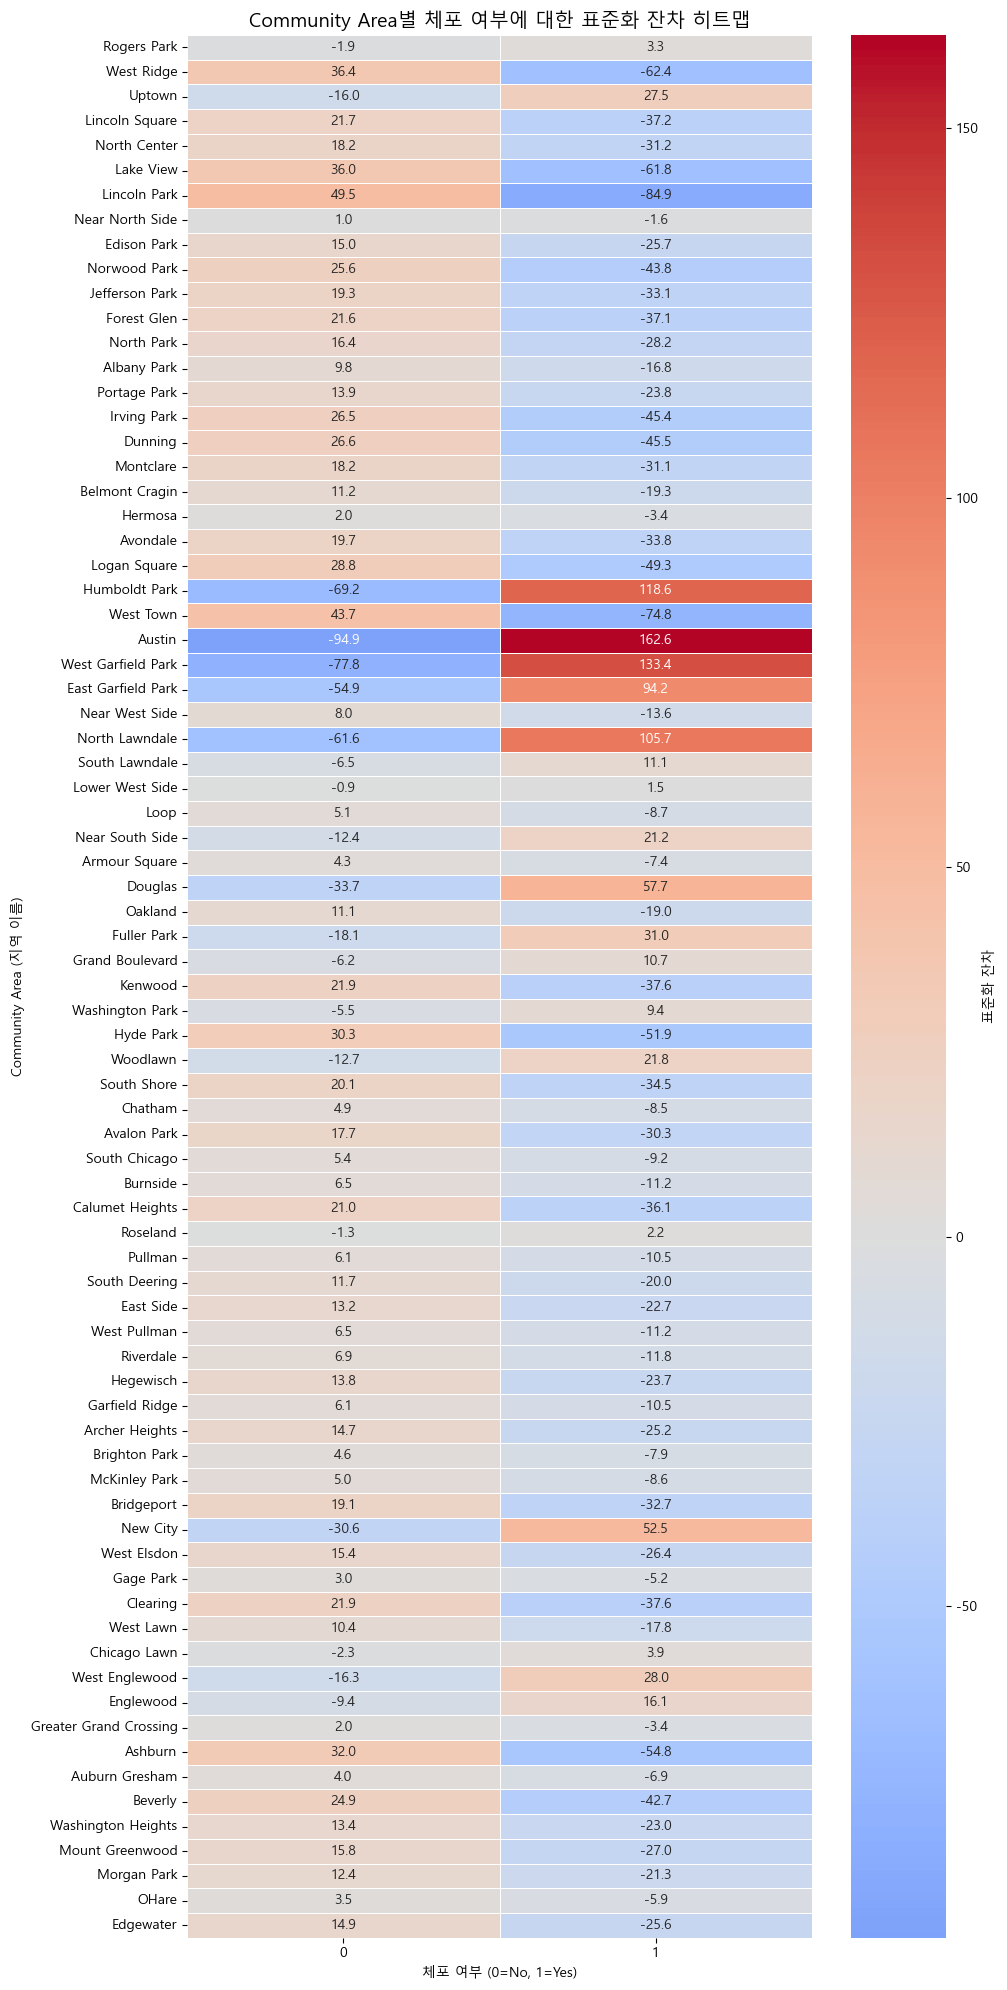

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# Arrest 값 숫자형으로 변환
df['Arrest_numeric'] = df['Arrest'].astype(int)

# 교차표 만들기
contingency_table = pd.crosstab(df['Community Area'], df['Arrest_numeric'])

# 카이제곱 기대값 계산
_, _, _, expected = chi2_contingency(contingency_table)

# 표준화 잔차 계산
standardized_residuals = (contingency_table - expected) / np.sqrt(expected)

# --------------------------------
# 🔹 지역 번호 → 지역 이름 매핑
# --------------------------------
area_name_mapping = df[['Community Area', 'Community Area Name']].dropna().drop_duplicates()
area_dict = dict(zip(area_name_mapping['Community Area'], area_name_mapping['Community Area Name']))

# index에 지역 이름 매핑
standardized_residuals_named = standardized_residuals.copy()
standardized_residuals_named.index = standardized_residuals_named.index.map(area_dict)

# --------------------------------
# 🔸 히트맵 시각화
# --------------------------------
plt.figure(figsize=(10, 20))  # 크기 조절 가능
sns.heatmap(
    standardized_residuals_named,
    annot=True,
    fmt=".1f",
    cmap='coolwarm',
    center=0,
    linewidths=0.5,
    cbar_kws={'label': '표준화 잔차'}
)
plt.title('Community Area별 체포 여부에 대한 표준화 잔차 히트맵', fontsize=14)
plt.xlabel('체포 여부 (0=No, 1=Yes)')
plt.ylabel('Community Area (지역 이름)')
plt.tight_layout()
plt.show()


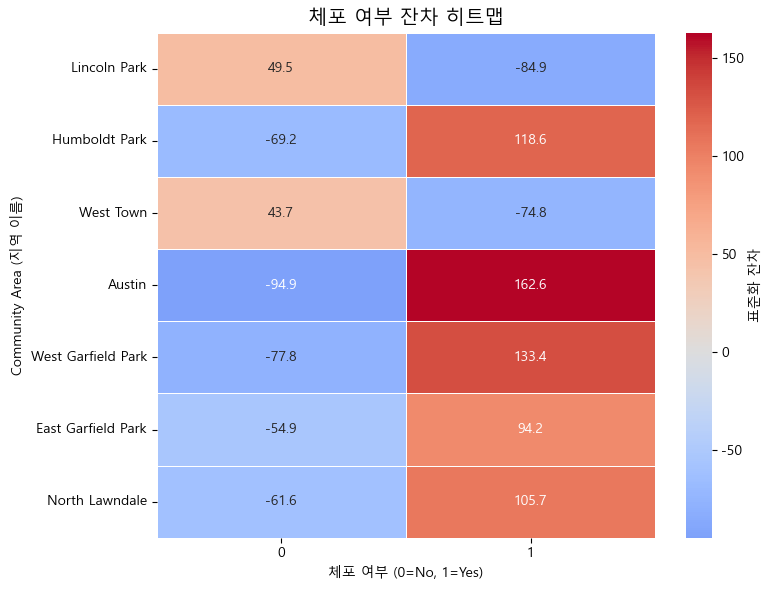

In [14]:
# 1. 상위 10개 조합 중 지역 이름만 뽑기 (중복 제거)
top10_areas = top10_resid['Community Area'].unique()

# 2. 전체 표준화 잔차에서 해당 지역만 필터링
filtered_residuals = standardized_residuals_named.loc[standardized_residuals_named.index.isin(top10_areas)]

# 3. 히트맵 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(
    filtered_residuals,
    annot=True,
    fmt=".1f",
    cmap='coolwarm',
    center=0,
    linewidths=0.5,
    cbar_kws={'label': '표준화 잔차'}
)
plt.title('체포 여부 잔차 히트맵', fontsize=14)
plt.xlabel('체포 여부 (0=No, 1=Yes)')
plt.ylabel('Community Area (지역 이름)')
plt.tight_layout()
plt.show()


C:\Users\qhwhr\AppData\Local\Temp\ipykernel_30132\2429393149.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


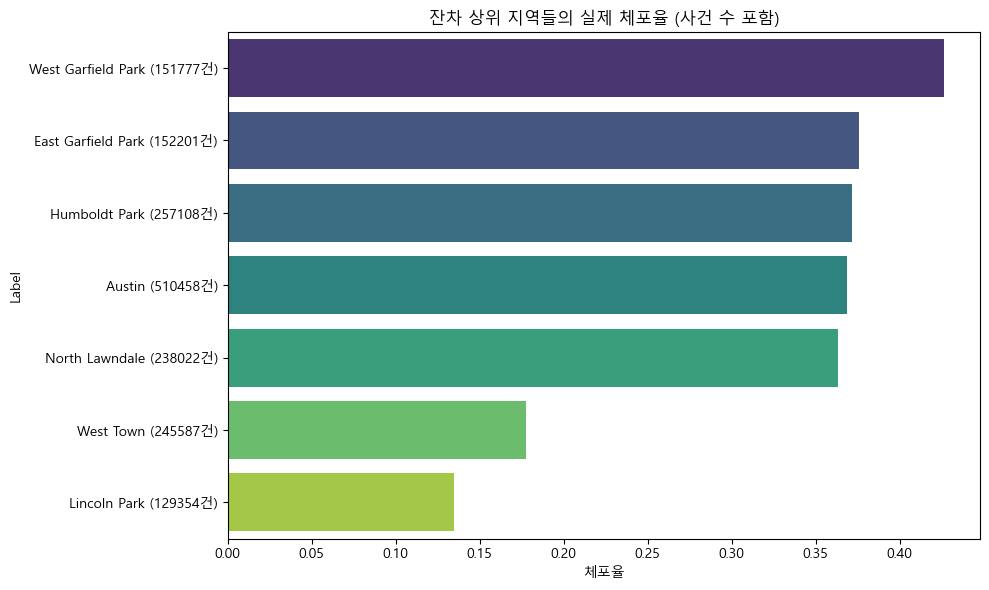

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. 잔차 상위 지역 이름 목록
top_area_names = top10_resid['Community Area'].unique()

# 2. 해당 지역만 필터링
subset_df = df[df['Community Area Name'].isin(top_area_names)]

# 3. 체포율 및 사건 수 계산
summary = (
    subset_df
    .groupby('Community Area Name')
    .agg(
        Total_Cases=('Arrest_numeric', 'count'),
        Arrests=('Arrest_numeric', 'sum')
    )
    .assign(Arrest_Rate=lambda x: x['Arrests'] / x['Total_Cases'])
    .reset_index()
)

# ✅ 지역 이름 옆에 사건 수 붙이기
summary['Label'] = summary['Community Area Name'] + f" (" + summary['Total_Cases'].astype(str) + "건)"

# 정렬
summary_sorted = summary.sort_values('Arrest_Rate', ascending=False)

# 시각화
plt.figure(figsize=(10, 6))
sns.barplot(
    data=summary_sorted,
    x='Arrest_Rate',
    y='Label',
    palette='viridis'
)

plt.xlabel('체포율')
plt.title('잔차 상위 지역들의 실제 체포율 (사건 수 포함)')
plt.tight_layout()
plt.show()


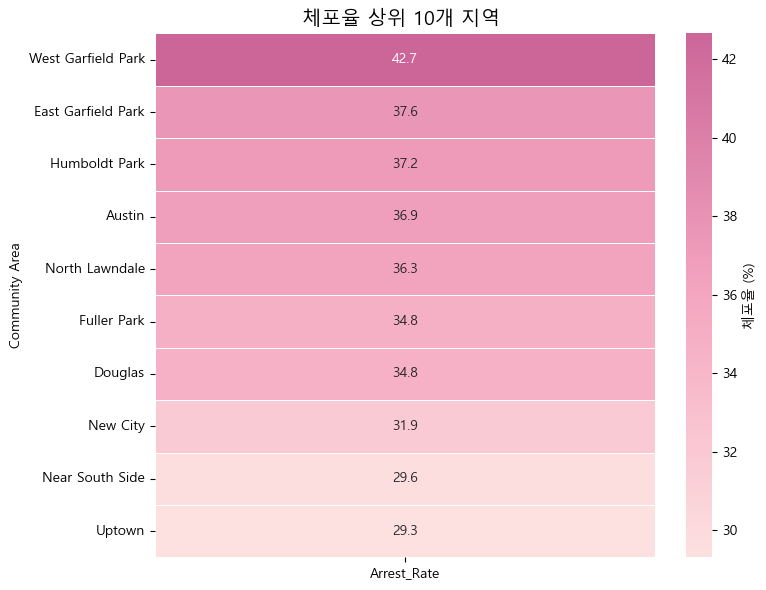

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# 1. 체포율 상위 10개 지역 계산
top10_area_summary = (
    df.groupby('Community Area Name')
    .agg(
        Total_Cases=('Arrest_numeric', 'count'),
        Arrests=('Arrest_numeric', 'sum')
    )
    .assign(Arrest_Rate=lambda x: x['Arrests'] / x['Total_Cases'] * 100)
    .sort_values('Arrest_Rate', ascending=False)
    .head(10)
    .reset_index()
)

# 2. 사용자 정의 핑크 컬러맵: 연한 → 진한 핑크
pink_gradient = LinearSegmentedColormap.from_list(
    "soft_pink", ["#fde0e0", "#f4a6c0", "#cc6699"]
)

# 3. 히트맵 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(
    data=top10_area_summary[['Arrest_Rate']].set_index(top10_area_summary['Community Area Name']),
    annot=True,
    fmt=".1f",
    cmap=pink_gradient,  # 체포율 높을수록 진한 핑크
    cbar_kws={'label': '체포율 (%)'},
    linewidths=0.5
)

plt.title('체포율 상위 10개 지역 ', fontsize=14)
plt.xlabel('')
plt.ylabel('Community Area')
plt.tight_layout()
plt.show()


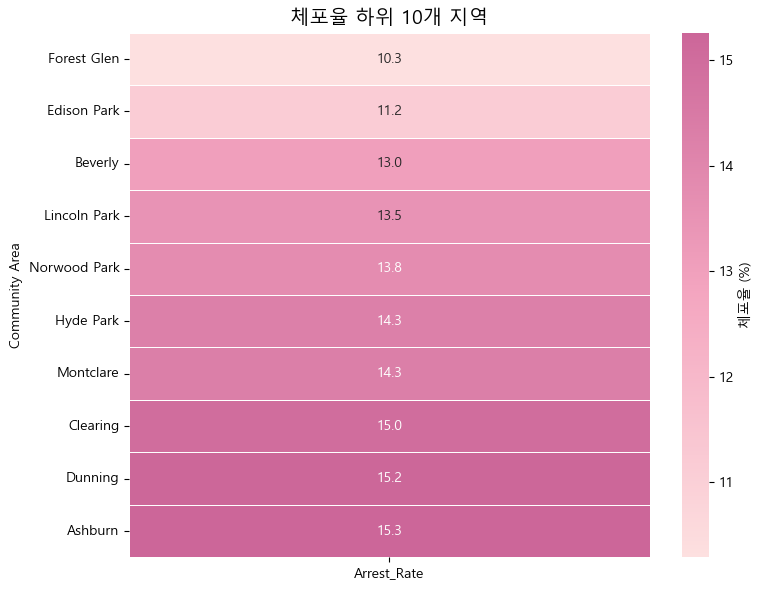

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# 1. 사용자 정의 핑크 컬러맵 (연한 → 진한 핑크)
pink_gradient = LinearSegmentedColormap.from_list(
    "soft_pink", ["#fde0e0", "#f4a6c0", "#cc6699"]
)

# 2. 체포율 하위 10개 지역 계산
bottom10_area_summary = (
    df.groupby('Community Area Name')
    .agg(
        Total_Cases=('Arrest_numeric', 'count'),
        Arrests=('Arrest_numeric', 'sum')
    )
    .assign(Arrest_Rate=lambda x: x['Arrests'] / x['Total_Cases'] * 100)
    .sort_values('Arrest_Rate', ascending=True)
    .head(10)
    .reset_index()
)

# 3. 히트맵 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(
    data=bottom10_area_summary[['Arrest_Rate']].set_index(bottom10_area_summary['Community Area Name']),
    annot=True,
    fmt=".1f",
    cmap=pink_gradient,  # 낮을수록 연하고, 높을수록 진해짐
    cbar_kws={'label': '체포율 (%)'},
    linewidths=0.5
)

plt.title('체포율 하위 10개 지역', fontsize=14)
plt.xlabel('')
plt.ylabel('Community Area')
plt.tight_layout()
plt.show()


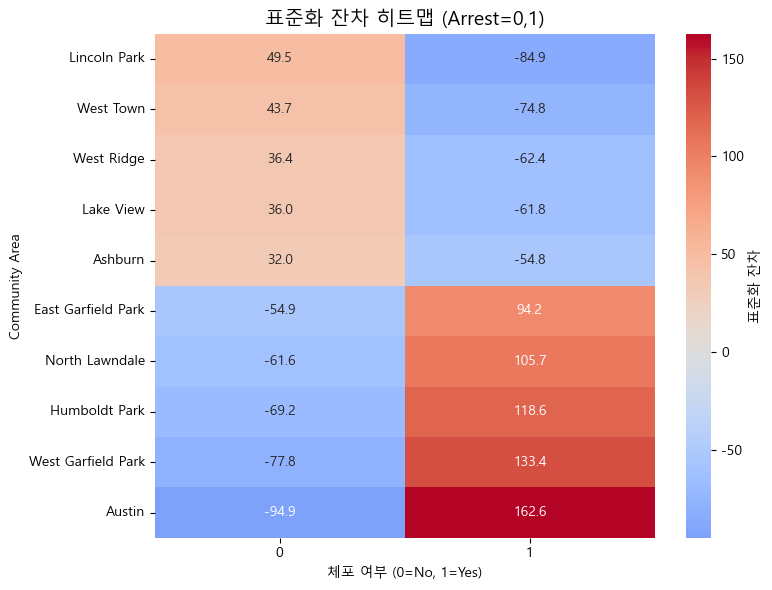

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# 1. 교차표 생성
contingency = pd.crosstab(df['Community Area Name'], df['Arrest_numeric'])

# 2. 카이제곱 + 기대값 + 잔차 계산
chi2, p, dof, expected = chi2_contingency(contingency)
residuals = (contingency - expected) / (expected ** 0.5)

# 3. 상위/하위 5개 지역 (Arrest=1 기준)
top5 = residuals[1].sort_values(ascending=False).head(5)
bottom5 = residuals[1].sort_values(ascending=True).head(5)

# 4. 히트맵용 데이터 구성
selected = pd.concat([top5, bottom5]).sort_values()
heatmap_data = residuals.loc[selected.index]

# 5. 히트맵 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap='coolwarm', center=0, cbar_kws={'label': '표준화 잔차'})
plt.title('표준화 잔차 히트맵 (Arrest=0,1)', fontsize=14)
plt.xlabel('체포 여부 (0=No, 1=Yes)')
plt.ylabel('Community Area')
plt.tight_layout()
plt.show()


In [33]:
import numpy as np
import pandas as pd
from scipy.stats import chi2_contingency
from math import sqrt

# 1. 데이터 불러오기 & 전처리
df['Arrest_numeric'] = df['Arrest'].astype(int)

# 2. 교차표 생성 (지역 × 체포여부)
contingency = pd.crosstab(df['Community Area Name'], df['Arrest_numeric'])

# 3. 카이제곱 검정 수행
chi2, p, dof, expected = chi2_contingency(contingency)

# 4. 기대도수 DataFrame
df_expected = pd.DataFrame(expected,
                           index=contingency.index,
                           columns=contingency.columns)

# 5. 유의성 판정
alpha = 0.05
significance = "기각" if p < alpha else "채택"

# 6. 표준화 잔차 계산
std_res = (contingency - expected) / np.sqrt(expected)
df_std_res = pd.DataFrame(std_res,
                          index=contingency.index,
                          columns=contingency.columns)

# 7. ±1.96 이상 잔차 셀 여부 (유의미한 셀 판단용)
sig_mask = np.abs(std_res) > 1.96
df_sig_mask = pd.DataFrame(sig_mask,
                           index=contingency.index,
                           columns=contingency.columns)

# 8. Cramer's V 계산 (효과 크기)
n = contingency.values.sum()
phi2 = chi2 / n
r, c = contingency.shape
k = min(r - 1, c - 1)
cramers_v = sqrt(phi2 / k)

# 9. 요약 출력
summary = {
    "카이제곱 통계량": round(chi2, 4),
    "p-value": round(p, 4),
    "자유도": dof,
    "귀무가설": f"{significance} (α = 0.05)",
    "Cramer's V": round(cramers_v, 4)
}

# 결과 확인
print("✅ 분석 요약 결과:")
for k, v in summary.items():
    print(f"{k}: {v}")


✅ 분석 요약 결과:
카이제곱 통계량: 199879.9195
p-value: 0.0
자유도: 76
귀무가설: 기각 (α = 0.05)
Cramer's V: 0.1554


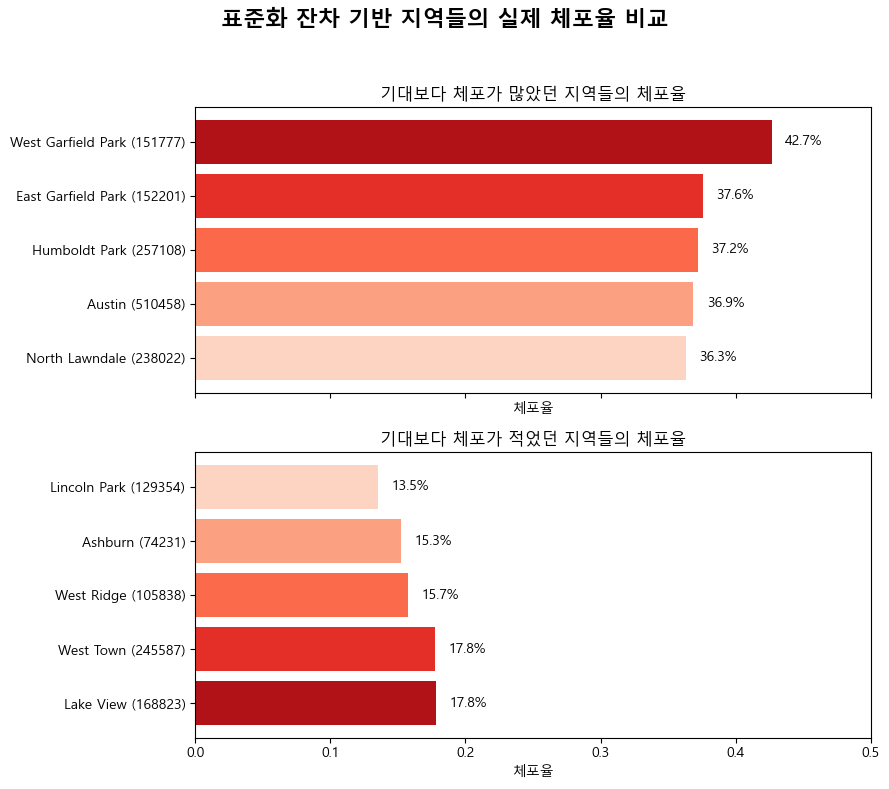

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 잔차 기준 상·하위 5개 지역 (Arrest=1 기준)
top5_residual = df_std_res[1].sort_values(ascending=False).head(5)
bottom5_residual = df_std_res[1].sort_values(ascending=True).head(5)

# 2. 체포율과 사건 수 계산
area_stats = df.groupby("Community Area Name").agg(
    Arrest_Rate=("Arrest_numeric", "mean"),
    Case_Count=("Arrest_numeric", "count")
)

# 3. 잔차 상·하위 지역에 해당하는 체포율/사건 수 추출
top5_selected = area_stats.loc[top5_residual.index]
bottom5_selected = area_stats.loc[bottom5_residual.index]
top5_selected = top5_selected.sort_values(by="Arrest_Rate", ascending=True)  # 높은 순
bottom5_selected = bottom5_selected.sort_values(by="Arrest_Rate", ascending=False)  # 낮은 순

# 4. 지역 이름 옆에 사건 수 표시
top5_selected.index = [f"{name} ({count})" for name, count in zip(top5_selected.index, top5_selected["Case_Count"])]
bottom5_selected.index = [f"{name} ({count})" for name, count in zip(bottom5_selected.index, bottom5_selected["Case_Count"])]

# 5. 시각화 (위: 상위 / 아래: 하위)
fig, axes = plt.subplots(2, 1, figsize=(9, 8), sharex=True)

# ▶ 상위 잔차 지역
bars_top = axes[0].barh(top5_selected.index, top5_selected["Arrest_Rate"], color=sns.color_palette("Reds", 5))
axes[0].set_title("기대보다 체포가 많았던 지역들의 체포율")
axes[0].set_xlim(0, 0.5)
axes[0].set_xlabel("체포율")
for bar in bars_top:
    width = bar.get_width()
    axes[0].text(width + 0.01, bar.get_y() + bar.get_height()/2, f"{width:.1%}", va='center', fontsize=10)

# ▶ 하위 잔차 지역
bars_bot = axes[1].barh(bottom5_selected.index, bottom5_selected["Arrest_Rate"], color=sns.color_palette("Reds_r", 5))
axes[1].set_title("기대보다 체포가 적었던 지역들의 체포율")
axes[1].set_xlim(0, 0.5)
axes[1].set_xlabel("체포율")
for bar in bars_bot:
    width = bar.get_width()
    axes[1].text(width + 0.01, bar.get_y() + bar.get_height()/2, f"{width:.1%}", va='center', fontsize=10)

# ▶ 전체 제목
plt.suptitle("표준화 잔차 기반 지역들의 실제 체포율 비교", fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()
# 정렬 추가




In [43]:
 pip install catboost

   ---------------------------------------- 0.0/101.7 MB ? eta -:--:--
   ---------------------------------------- 0.3/101.7 MB ? eta -:--:--
    --------------------------------------- 1.8/101.7 MB 6.3 MB/s eta 0:00:16
   - -------------------------------------- 4.2/101.7 MB 9.0 MB/s eta 0:00:11
   -- ------------------------------------- 6.8/101.7 MB 9.8 MB/s eta 0:00:10
   --- ------------------------------------ 8.7/101.7 MB 9.8 MB/s eta 0:00:10
   ---- ----------------------------------- 11.0/101.7 MB 9.8 MB/s eta 0:00:10
   ----- ---------------------------------- 13.4/101.7 MB 10.1 MB/s eta 0:00:09
   ----- ---------------------------------- 14.7/101.7 MB 10.3 MB/s eta 0:00:09
   ------ --------------------------------- 15.5/101.7 MB 9.0 MB/s eta 0:00:10
   ------ --------------------------------- 16.0/101.7 MB 8.4 MB/s eta 0:00:11
   ------- -------------------------------- 17.8/101.7 MB 8.2 MB/s eta 0:00:11
   ------- -------------------------------- 20.2/101.7 MB 8.5 MB/s eta

In [49]:
# 1. 라이브러리 불러오기
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.utils.class_weight import compute_class_weight
from catboost import CatBoostClassifier

# 3. 범주형 컬럼 변환 (NaN → 'Missing')
for col in ['Primary Type', 'Description', 'Community Area', 'Location Description']:
    df[col] = df[col].astype(str).fillna('Missing')

# 4. Feature / Target 설정
features = [
    'Year', 'Month', 'Primary Type', 'Description', 'Community Area',
    'Latitude', 'Longitude', 'Offense Level Median',
    'Dist_to_Nearest_HighRisk', 'min_distance_to_police',
    'Location Description'
]
target = 'Arrest'

X = df[features]
y = df[target].astype(int)

# 5. CatBoost용 범주형 컬럼 지정
cat_features = ['Primary Type', 'Description', 'Community Area', 'Location Description']

# 6. 클래스 불균형 자동 가중치 계산
weights = compute_class_weight(class_weight='balanced', classes=np.unique(y), y=y)
class_weights = dict(zip(np.unique(y), weights))
print("자동 계산된 클래스 가중치:", class_weights)

# 7. Train/Test 분할
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42
)

# 8. CatBoostClassifier 정의 + 불균형 처리 적용
model = CatBoostClassifier(
    iterations=300,
    learning_rate=0.1,
    depth=6,
    eval_metric='F1',
    class_weights=class_weights,  # ✅ 수정된 부분
    early_stopping_rounds=30,
    verbose=100,
    random_seed=42
)

# 9. 모델 학습
model.fit(X_train, y_train, cat_features=cat_features, eval_set=(X_test, y_test))

# 10. 예측 및 평가
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


📊 자동 계산된 클래스 가중치: {0: 0.6701683819241534, 1: 1.9691330855542175}
0:	learn: 0.7786947	test: 0.7775381	best: 0.7775381 (0)	total: 6.23s	remaining: 31m 3s
100:	learn: 0.8146902	test: 0.8144995	best: 0.8144995 (100)	total: 5m 21s	remaining: 10m 34s
200:	learn: 0.8163192	test: 0.8159530	best: 0.8159530 (200)	total: 10m 59s	remaining: 5m 25s
299:	learn: 0.8172405	test: 0.8167902	best: 0.8167902 (299)	total: 16m 41s	remaining: 0us

bestTest = 0.8167902081
bestIteration = 299

              precision    recall  f1-score   support

           0       0.92      0.90      0.91   1235014
           1       0.72      0.76      0.74    420321

    accuracy                           0.86   1655335
   macro avg       0.82      0.83      0.82   1655335
weighted avg       0.87      0.86      0.86   1655335



In [51]:
from imblearn.over_sampling import SMOTE

# 1. 범주형/수치형 나누기
cat_cols = ['Primary Type', 'Description', 'Community Area', 'Location Description']
num_cols = [col for col in X_train.columns if col not in cat_cols]

# 2. 수치형만 SMOTE 적용
smote = SMOTE(random_state=42)
X_num_resampled, y_resampled = smote.fit_resample(X_train[num_cols], y_train)

# 3. 범주형 컬럼 원본에서 복사해서 붙이기 (reset index 필요!)
X_cat = X_train[cat_cols].reset_index(drop=True).iloc[:len(X_num_resampled)]
X_resampled = pd.concat([X_num_resampled.reset_index(drop=True), X_cat], axis=1)


In [55]:
import folium
from folium import Choropleth, CircleMarker

# 지도 중심 설정 (예: 시카고 중심 좌표)
m = folium.Map(location=[41.8781, -87.6298], zoom_start=10)

# Community Area별 평균 위경도, 체포확률 집계
area_stats = df.groupby('Community Area').agg({
    'Latitude': 'mean',
    'Longitude': 'mean',
    'Arrest_Prob': 'mean'
}).reset_index()

# Circle Marker로 시각화
for _, row in area_stats.iterrows():
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=8,
        color=None,
        fill=True,
        fill_color=plt.cm.Reds(row['Arrest_Prob']),  # 컬러맵을 수치로 변환
        fill_opacity=0.7,
        popup=f"CA: {row['Community Area']}<br>체포확률: {row['Arrest_Prob']:.2%}"
    ).add_to(m)

m.save("arrest_probability_map.html")


In [56]:
m.save("arrest_map.html")  # 이걸로 저장
# 저장한 html 파일을 직접 브라우저에서 열어봐!


In [62]:
import folium
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors

# colormap 준비 (0~1 범위 Reds 컬러맵)
colormap = cm.get_cmap('Reds')
norm = mcolors.Normalize(vmin=0, vmax=1)  # 0~1 정규화

# 지도 초기화
m = folium.Map(location=[41.87, -87.62], zoom_start=10)

# 예측 확률 기준 시각화 (색상 & 크기 조정)
for _, row in area_stats.iterrows():
    prob = row['Arrest_Prob']
    rgba = colormap(norm(prob))                 # RGBA 색상 얻기
    hex_color = mcolors.to_hex(rgba)            # HEX로 변환

    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=prob * 30,  # 확률 기반 크기
        color=None,
        fill=True,
        fill_opacity=0.8,
        fill_color=hex_color,  # ✔ 연핑크~빨강 적용
        tooltip=f"CA: {row['Community Area']}<br>체포확률: {prob*100:.2f}%",
    ).add_to(m)

# 지도 저장
m.save("arrest_prediction_map.html")


C:\Users\qhwhr\AppData\Local\Temp\ipykernel_30132\2466524966.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = cm.get_cmap('Reds')


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8276672 entries, 0 to 8276671
Data columns (total 38 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   ID                        int64  
 1   Case Number               object 
 2   Date                      object 
 3   Block                     object 
 4   IUCR                      object 
 5   Primary Type              object 
 6   Description               object 
 7   Location Description      object 
 8   Arrest                    bool   
 9   Domestic                  bool   
 10  Beat                      int64  
 11  District                  float64
 12  Ward                      float64
 13  Community Area            object 
 14  FBI Code                  object 
 15  X Coordinate              float64
 16  Y Coordinate              float64
 17  Year                      int64  
 18  Updated On                object 
 19  Latitude                  float64
 20  Longitude               

In [75]:
import pandas as pd
import geopandas as gpd
from shapely import wkt
import folium
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors
from folium.features import GeoJsonTooltip

# 1. 파일 불러오기
df_geo = pd.read_csv("CommAreas_20250408.csv", encoding='utf-8', low_memory=False)  # 시카고 경계

# 2. Community Area 이름 매핑
df_geo = df_geo[['AREA_NUMBE', 'COMMUNITY', 'the_geom']].drop_duplicates()
df_geo.columns = ['Community Area', 'Community Area Name', 'geometry_str']

# 3. geometry 문자열을 shapely Polygon으로 변환
df_geo['geometry'] = df_geo['geometry_str'].apply(wkt.loads)
gdf_geo = gpd.GeoDataFrame(df_geo, geometry='geometry', crs='EPSG:4326')

# 4. Community Area 번호를 문자열로 통일
gdf_geo['Community Area'] = gdf_geo['Community Area'].astype(str)
df['Community Area'] = df['Community Area'].astype(float).astype(int).astype(str)



# 5. 예측 확률 계산
features = [
    'Year', 'Month', 'Primary Type', 'Description', 'Community Area',
    'Latitude', 'Longitude', 'Offense Level Median',
    'Dist_to_Nearest_HighRisk', 'min_distance_to_police',
    'Location Description'
]
df['Arrest_Prob'] = model.predict_proba(df[features])[:, 1]

# 6. 지역별 평균 체포 확률
area_avg = df.groupby('Community Area')['Arrest_Prob'].mean().reset_index()

# 7. 병합 (지역 이름은 gdf에 있음)
gdf = gdf_geo.merge(area_avg, on='Community Area', how='left')

# 8. Choropleth 스타일 함수
cmap = cm.get_cmap('Reds')
norm = mcolors.Normalize(vmin=0, vmax=1)

def style_function(feature):
    prob = feature['properties'].get('Arrest_Prob')
    if prob is None or pd.isna(prob):
        return {'fillOpacity': 0.1, 'color': 'lightgrey', 'fillColor': 'lightgrey', 'weight': 0.5}
    rgba = cmap(norm(prob))
    return {
        'fillOpacity': 0.7,
        'weight': 0.5,
        'fillColor': mcolors.to_hex(rgba),
        'color': 'black'
    }

# 9. Folium 지도 생성
m = folium.Map(location=[41.87, -87.62], zoom_start=10)

folium.GeoJson(
    gdf.to_json(),
    name="Community Area 체포 확률",
    style_function=style_function,
    tooltip=GeoJsonTooltip(
        fields=["Community Area Name", "Arrest_Prob"],
        aliases=["지역 이름", "예측 체포확률"],
        localize=True,
        sticky=False,
        labels=True
    )
).add_to(m)

# 10. 지도 저장
m.save("Community_Area_Prediction_Map.html")


CatBoostError: Invalid type for cat_feature[non-default value idx=485,feature_idx=10]=nan : cat_features must be integer or string, real number values and NaN values should be converted to string.

In [77]:
import pandas as pd
import geopandas as gpd
from shapely import wkt
import folium
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors
from folium.features import GeoJsonTooltip

# 1. 파일 불러오기
df_geo = pd.read_csv("CommAreas_20250408.csv", encoding='utf-8', low_memory=False)
df = pd.read_csv("df_sample.csv")  # df도 다시 불러온다고 가정

# 2. Community Area 이름 매핑
df_geo = df_geo[['AREA_NUMBE', 'COMMUNITY', 'the_geom']].drop_duplicates()
df_geo.columns = ['Community Area', 'Community Area Name', 'geometry_str']

# 3. geometry 변환 → GeoDataFrame
df_geo['geometry'] = df_geo['geometry_str'].apply(wkt.loads)
gdf_geo = gpd.GeoDataFrame(df_geo, geometry='geometry', crs='EPSG:4326')

# 4. Community Area 번호 타입 통일
gdf_geo['Community Area'] = gdf_geo['Community Area'].astype(str)
df['Community Area'] = df['Community Area'].astype(float).astype(int).astype(str)

# 5. 실제 체포율 계산
actual_rate = df.groupby('Community Area')['Arrest'].mean().reset_index()
actual_rate.columns = ['Community Area', 'Actual_Arrest_Rate']

# 6. 병합
gdf_actual = gdf_geo.merge(actual_rate, on='Community Area', how='left')

# 7. Choropleth 스타일 함수
cmap = cm.get_cmap('Reds')
norm = mcolors.Normalize(vmin=0, vmax=1)

def style_function_actual(feature):
    rate = feature['properties'].get('Actual_Arrest_Rate')
    if rate is None or pd.isna(rate):
        return {'fillOpacity': 0.1, 'color': 'lightgrey', 'fillColor': 'lightgrey', 'weight': 0.5}
    rgba = cmap(norm(rate))
    return {
        'fillOpacity': 0.7,
        'weight': 0.5,
        'fillColor': mcolors.to_hex(rgba),
        'color': 'black'
    }

# 8. Folium 지도 생성
m = folium.Map(location=[41.87, -87.62], zoom_start=10,tiles="cartodbpositron")

folium.GeoJson(
    gdf_actual.to_json(),
    name="실제 체포율 Choropleth",
    style_function=style_function_actual,
    tooltip=GeoJsonTooltip(
        fields=["Community Area Name", "Actual_Arrest_Rate"],
        aliases=["지역 이름", "실제 체포율"],
        localize=True,
        sticky=False,
        labels=True
    )
).add_to(m)

# 9. 저장
m.save("Community_Area_Actual_Arrest_Map.html")


C:\Users\qhwhr\AppData\Local\Temp\ipykernel_30132\522236678.py:34: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('Reds')


In [73]:
# 오스틴 지역만 필터링
austin_df = df[df['Community Area Name'].str.upper() == 'AUSTIN']

# 체포율 계산
austin_arrest_rate = austin_df['Arrest'].mean()

print(f"AUSTIN 지역 실제 체포율: {austin_arrest_rate:.4f}")


AUSTIN 지역 실제 체포율: 0.3864


In [76]:
print(df[cat_features].isna().sum())

Primary Type             0
Description              0
Community Area           0
Location Description    78
dtype: int64
